# Grappa Student Seminar
### Weekly programming assignments - Week 1
#### Dylan van Arneman, Gijs Leguijt, Sven Poelmann, Yoran Yeh

[Github link](https://github.com/adam-coogan/GRAPPA_Student_Seminar_2019)

Support $\LaTeX$

$H(T_{fo})=\Gamma(T_{fo}) = v(T_{fo})n(T_{fo})\sigma(T_{fo})$

## Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.constants import *
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
%matplotlib inline

## Units & Constants

We used natural units, $c = \hbar = k_B = 1$, the following constants are used to convert units.

In [4]:
"""Ünits____________________________________________________"""
eV = 1                                           #electron volt

J = eV / e                                               #Joule
s = 1 / (hbar * J)                                      #second
m = s / c                                                #meter
kg = J * c**(-2)                                     #kilograms
K = J * k                                               #Kelvin

"""Constants________________________________________________""" 

G = G * (m**3 / (kg * s**2))                   #Newton constant
M_pl = value('Planck mass') * kg                   #Planck mass
GeV = 1.0e9 * eV                            #Giga electron volt
G_f = value('Fermi coupling constant') / GeV**2 #Fermi constant
T_CMB = 2.725 * K
Mpc = 3.085e22 * m
H = 67.8e3 * (m / s) / Mpc
h_hub = H / (1.0e5 * (m / s) / Mpc)
rho_c = 1.9e-26 * h_hub**2 * kg / m**3

## Code

$n \sim \frac{m^3}{x^{3/2}} e^{-x}$ and we know $H(T_{fo}) \sim \frac{T^2_{fo}}{M_{pl}}$

$H \sim n\sigma v \Rightarrow \frac{T^2_{fo}}{M_{pl}} = \frac{m^3}{x^{3/2}} e^{-x} \sigma$

$\frac{m^3}{x^{3/2}_0} e^{-x_0} = \frac{T_{fo}^2}{M_{pl}\sigma} = \frac{m^2}{x^{2}_0 M_{pl} \sigma} $

### Hot Dark Matter

For Hot Dark Matter $ n \propto T^3$ since the particles are relativistic.
$\sigma n = H \Rightarrow \sigma T^3_{fo} = \frac{T^2_{fo}}{M_{pl}} = T_{fo} = \frac{1}{\sigma M_{pl}}$

$n = \frac{H}{\sigma} = \frac{T^2_{fo}}{M_{pl} \sigma} = \frac{m^2}{x_0^2 M_{pl} \sigma}$

$\Omega_{HDM} = \frac{\rho_{HDM}}{\rho_c} = \frac{m n(T_0)}{\rho_c} = \frac{m T^3_0}{\rho_c} \frac{n(T_0)}{T^3_0} $
$ = \frac{m T^3_0}{\rho_c} \frac{n(T_{fo})}{T^3_{fo}} = \frac{T^3_0}{\rho_c} x_{fo} (\frac{???}{T_{fo}^2}) = \frac{T^3_0}{\rho_c M_{pl}} \frac{x_{fo}}{\sigma} $

In [5]:
mass = np.linspace(10,100,50) * GeV
dof = 1
zheta_3 = 1.202
Omega_hdm = mass * T_CMB**3 / rho_c * zheta_3 * dof / np.pi**2

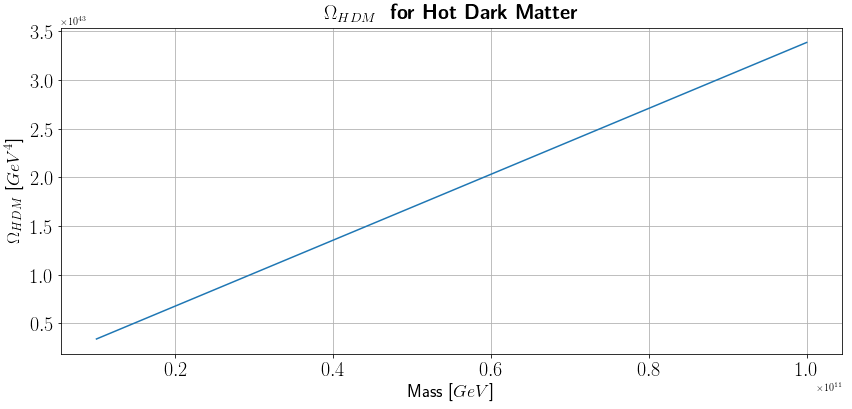

In [6]:
plt.figure(1,figsize=(14, 6))

plt.plot(mass,Omega_hdm, )
plt.ylabel(r'$\Omega_{HDM}$ [$GeV^4$] ',fontsize=18)
plt.xlabel(r'Mass [$GeV$]',fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'$\Omega_{HDM}$ \textbf{ for Hot Dark Matter}',fontsize=20)
plt.grid(True)

# plt.legend(prop=dict(size=18))
plt.show()

### Cold Dark Matter

For Cold Dark Matter: $e^{-x_0} \sqrt{x_0} = \frac{1}{M_pl m \sigma} \equiv K$

$\ln{e^{-x_0} \sqrt{x_0}} = \ln{K}$ 
$\Rightarrow \ln{\sqrt{x_0}}-x_0 = \frac{1}{2} \ln{x_0} - x_0 = \ln{K}$

To solve this for $T_{fo}$ we can either solve this numerically or use $T_{fo} \gg m $

Using $T_{fo} \gg m $ we get:
$x_{fo} = -\ln{K} = -\ln{\frac{1}{(M_{pl} m \sigma)}} = \ln{(M_{pl} m \sigma)} \Rightarrow T_{fo} = \frac{m}{\ln{(M_{pl} m \sigma)}}$

This gives: $\Omega_{CDM} = \frac{T^3_0}{M_{pl} \rho_c} \frac{x_{fo}}{\sigma} = \frac{T^3_0}{M_{pl} \rho_c} \frac{\ln{(M_{pl} m \sigma)}}{\sigma}$

## Andere manier

$\Omega_{DM} = 0.2 \frac{x_{fo}}{20} (\frac{10^{-8} GeV^{-2}}{\sigma})$

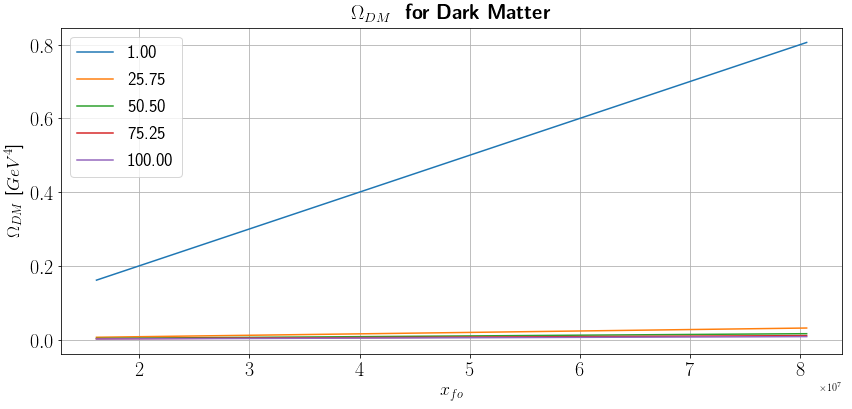

In [18]:
x_fo = np.linspace(20,100,4)* kg/K
sigma = np.linspace(1,100,5)
plt.figure(1,figsize=(14, 6))
for i in sigma:
    omega_dm = 10e-2 *x_fo*10e-8/i
    plt.plot(x_fo,omega_dm,label= "%.2f"%i)
plt.ylabel(r'$\Omega_{DM}$ [$GeV^4$] ',fontsize=18)
plt.xlabel(r'$x_{fo}$',fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'$\Omega_{DM}$ \textbf{ for Dark Matter}',fontsize=20)
plt.grid(True)

plt.legend(prop=dict(size=18))
plt.show()